<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%202D%20CNN%20-%20MNIST%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - 2D CNN - MNIST Digit Recognization**

In [1]:
%pip install -q tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sahug\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.0


**Approach 1**

In [5]:
%pip install -q tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\sahug\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
                                "mnist",
                                split=["train", "test"],                                
                                shuffle_files=True,
                                # True, the returned tf.data.Dataset will have a 2-tuple structure (input, label)
                                # False, the default, the returned tf.data.Dataset will have a dictionary with all the features.
                                as_supervised=True, 
                                with_info=True)

c:\Users\sahug\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\sahug\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

**Features**

Labels

In [8]:
ds_info.features
print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)
print(ds_info.features["label"].int2str(7))  # Human readable version (8 -> 'cat')
print(ds_info.features["label"].str2int('7'))

10
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
7
7


**Shapes**

Image and Label

In [9]:
print(ds_info.features.shape)
print(ds_info.features.dtype)
print(ds_info.features['image'].shape)
print(ds_info.features['image'].dtype)

print(ds_info.features['label'].shape)
print(ds_info.features['label'].dtype)

{'image': (28, 28, 1), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(28, 28, 1)
<dtype: 'uint8'>
()
<dtype: 'int64'>


**Test and Train Dataset**

In [10]:
print(list(ds_info.splits.keys()))

print("\n")

# Train DS
print(ds_info.splits['train'].num_examples)
print(ds_info.splits['train'].filenames)
print(ds_info.splits['train'].num_shards)

print("\n")

# Test DS
print(ds_info.splits['test'].num_examples)
print(ds_info.splits['test'].filenames)
print(ds_info.splits['test'].num_shards)

['train', 'test']


60000
['mnist-train.tfrecord-00000-of-00001']
1


10000
['mnist-test.tfrecord-00000-of-00001']
1


**Visualize**

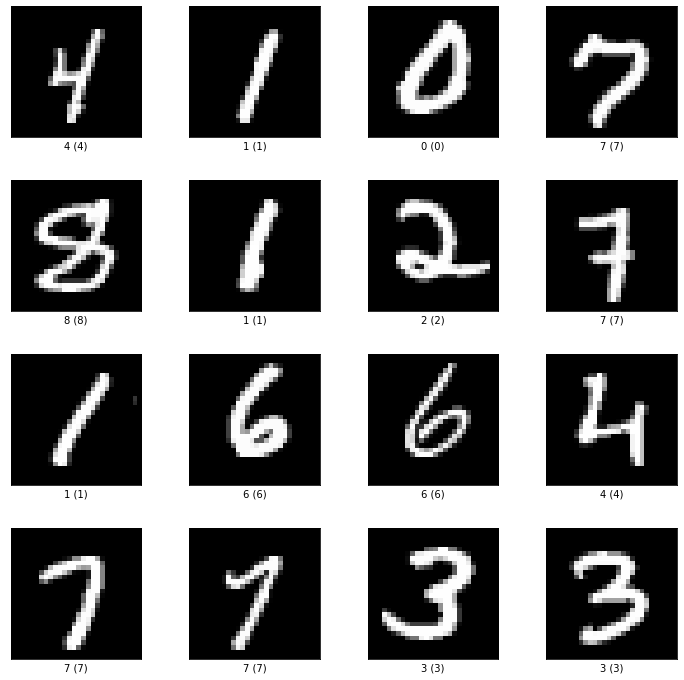

In [11]:
fig = tfds.show_examples(ds_train, ds_info, rows=4, cols=4)

**Data Pipeline**

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH = 128
EPOCHS = 10

Train

In [13]:
# This will save some operations (like file opening and data reading) from being executed during each epoch.
ds_train = ds_train.cache()

# Fills a buffer with buffer size elements, then randomly samples elements from this buffer, 
# replacing the selected elements with new elements. For perfect shuffling, 
# a buffer size greater than or equal to the full size of the dataset is required.
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Pulls data in batches rather than all at once.
ds_train = ds_train.batch(BATCH)

# While the model is executing training step s, the input pipeline is reading the data for step s+1.
# AUTOTUNE will automatically decide the value. 
ds_train = ds_train.prefetch(AUTOTUNE)

Test

In [14]:
ds_test = ds_test.batch(BATCH)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(AUTOTUNE)

**Input Shape**

In [15]:
input_shape = ds_info.features['image'].shape
input_shape

(28, 28, 1)

**Model**

In [17]:
from tensorflow import keras
from keras import layers, activations

# Input Layer
inputs = keras.Input(shape=(input_shape))

# Normalization Layer
x = layers.Rescaling(1.0/255.0)(inputs)

# CONV2D Layer
x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation=activations.relu)(x)
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation=activations.relu)(x)

# Maxpool Layer
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Dropout Layer
x = layers.Dropout(0.25)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation=activations.relu)(x)
x = layers.Dropout(0.5)(x)

# Output Layer
outputs = layers.Dense(10, activation=activations.softmax)(x)

model = keras.Model(inputs=inputs, outputs=[outputs], name="mnist_model")

**Summary**

In [18]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                       

**Compile**

In [19]:
losses = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = [keras.metrics.SparseCategoricalAccuracy()]
 
model.compile(loss=losses, optimizer=optim, metrics=metrics)

c:\Users\sahug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Tensorboard**

In [33]:
%load_ext tensorboard
import datetime

# Clear any logs from previous runs
!del -ff ./logs/

# Log Dir
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Invalid switch - "logs".


**Train**

In [34]:
history = model.fit(ds_train, 
                        epochs=EPOCHS,
                        batch_size=128, 
                        validation_data=ds_test, 
                        verbose=1, 
                        callbacks=[tensorboard_callback])

Epoch 1/10
469/469 [==============================] - 58s 123ms/step - loss: 2.4804 - accuracy: 0.9687 - val_loss: 0.2066 - val_accuracy: 0.9892
Epoch 2/10
469/469 [==============================] - 84s 178ms/step - loss: 0.2656 - accuracy: 0.9726 - val_loss: 0.1139 - val_accuracy: 0.9871
Epoch 3/10
469/469 [==============================] - 87s 185ms/step - loss: 0.1450 - accuracy: 0.9759 - val_loss: 0.1038 - val_accuracy: 0.9888
Epoch 4/10
469/469 [==============================] - 101s 214ms/step - loss: 0.1145 - accuracy: 0.9785 - val_loss: 0.0859 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 92s 197ms/step - loss: 0.0941 - accuracy: 0.9798 - val_loss: 0.0825 - val_accuracy: 0.9883
Epoch 6/10
469/469 [==============================] - 88s 187ms/step - loss: 0.0798 - accuracy: 0.9827 - val_loss: 0.0770 - val_accuracy: 0.9897
Epoch 7/10
469/469 [==============================] - 103s 219ms/step - loss: 0.0731 - accuracy: 0.9828 - val_loss: 0.0839 - val_

**View Tensorboard**

`http://localhost:6006/`

In [35]:
%tensorboard --logdir logs/fit

**Learning Visualiization**

In [21]:
epoch_range = range(1, 11)

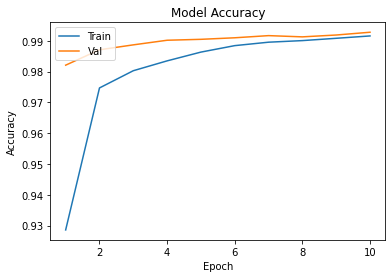

In [24]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range, history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

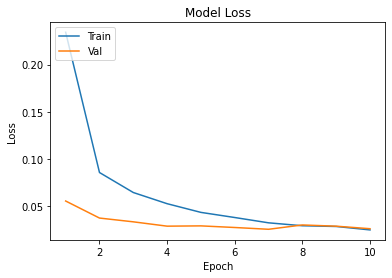

In [23]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

**Approach 2**

In [26]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load_data splits the dataset in to train and test tupples.

# Bringing all our datset between 1 and 0. To do that we are dividing our dataset by maxvalue. Which is 255.
x_train = x_train/255.0
x_test = x_test/255.0


# Reshapping our dataset
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


input_shape = x_train[0].shape

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape)) #Layer 1

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) #Layer 2

model.add(MaxPool2D(pool_size=(2, 2))) # Layer 3. Adding MaxPool Layer

model.add(Dropout(0.25)) # Layer 4. Adding dropout layer. 25% of neurons will randomly drop bfore going to next layer.

model.add(Flatten()) # Layer 5. Adding Flatten Layer. Converts to 2D.

model.add(Dense(128, activation="relu")) # Layer 6. Adding Dense Layer.

model.add(Dropout(0.5)) # Layer 7. Adding dropout layer. 50% of neurons will randomly drop bfore going to next layer.

model.add(Dense(10, activation="softmax")) # Layer 8. Output Layer. 10 is the number of different output. 0 - 9. 

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 49s 103ms/step - loss: 0.2362 - accuracy: 0.9278 - val_loss: 0.0536 - val_accuracy: 0.9837
Epoch 2/10
469/469 [==============================] - 62s 131ms/step - loss: 0.0837 - accuracy: 0.9748 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 3/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0626 - accuracy: 0.9809 - val_loss: 0.0351 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 67s 142ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 69s 147ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0301 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 67s 142ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0277 - val_accuracy: 0.9916
Epoch 7/10
469/469 [==============================] - 67s 142ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0266 - val_ac

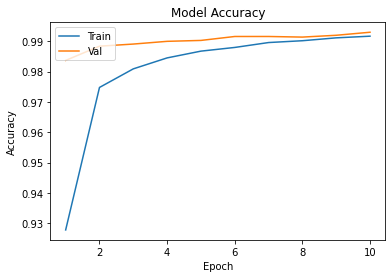

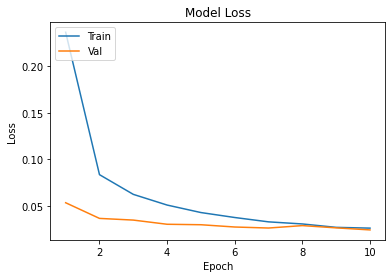

In [28]:
epoch_range = range(1, 11)

# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()